# Project 3: Binary Star System
By: Kristin Aoki and Colin Snow

In [2]:
# Configure Jupyter so figures appear in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Question
If Alpha Centuari (the closest star to our solar system) were to enter the solar system at the speed it is currently traveling at towards Earth, how would it interact with the sun and how close would it need to be to become a binary star system?
    A binary star system is a star system consisting of two stars orbiting around their center of mass. In order to form a binary star system the gravitational force between the bodies must cause rotation before the distance between the stars is large enough that the gravitational force becomes insignificant.
    Before we begin modeling we must draw a schematic to understand the relationship between the two bodies. The image below shows how the stars will interact with each other and will help us understand our model.

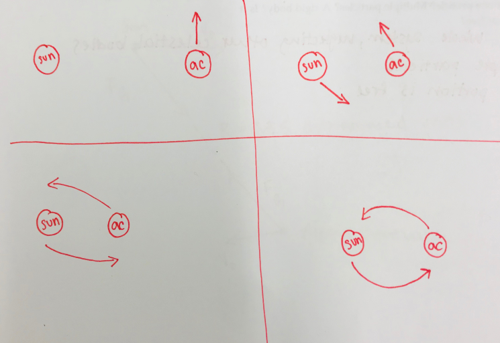

In [3]:
import PIL
from PIL import Image
im=Image.open("cartoon.jpg")
size=500,500
im.thumbnail(size)
im

The model we built is based on Newton's Law of Gravity: F = G ((m1*m2)/r^2). This equation is the basis of our schematic pictured below.


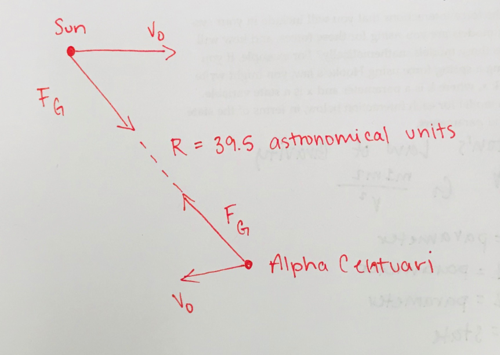

In [4]:
import PIL
from PIL import Image
im=Image.open("schematic.jpg")
size=500,500
im.thumbnail(size)
im

# Model

In [5]:
m = UNITS.meter
s = UNITS.second
kg =UNITS.kilogram
# 5e12 *s   1.3925*1000000000000

<Unit('kilogram')>

In [6]:
t_end=0

x1=0
y1=0
vx1=0
vy1=0

x2=7.785e11
y2=0
vx2=0
vy2=19986
m1=1.989e30
m2=1.989e30*1.1

velocity1=Vector(vx1,vy1)
velocity2=Vector(vx2,vy2)
position1=Vector(x1,y1)
position2=Vector(x2,y2)
com_position=(position1*m1+position2*m2)/(m1+m2)
com_velocity=(velocity1*m1+velocity2*m2)/(m1+m2)

init=State(x1=x1-com_position.x,
           y1=y1-com_position.y,
           vx1=vx1-com_velocity.x,
           vy1=vy1-com_velocity.y,
           x2=x2-com_position.x,
           y2=y2-com_position.y,
           vx2=vx2-com_velocity.x,
           vy2=vy2-com_velocity.y)

system = System(init=init, 
                    m1=m1, 
                    m2=m2, 
                    G=6.67e-11, 
                    t_end=t_end)

,values
init,x1 -407785714285.7143 dimensionless y1 ...
m1,1.989e+30
m2,2.1879e+30
G,6.67e-11
t_end,0


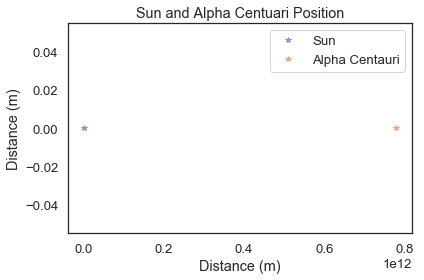

In [6]:
plot(x1,y1,'*', label = 'Sun')
plot(x2,y2,'*', label = 'Alpha Centauri')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Position',
             xlabel='Distance (m)', 
             ylabel='Distance (m)')
decorate_orbit()

This graph established the stars original positions. We use this graph as a refernece to the stars movement in the later model.

# Stable Orbit

In [7]:
def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x1,y1,vx1,vy1,x2,y2,vx2,vy2 = state
    unpack(system)
    velocity1=Vector(vx1,vy1)
    position1=Vector(x1,y1)
    velocity2=Vector(vx2,vy2)
    position2=Vector(x2,y2)
    r=sqrt((x1-x2)**2+(y1-y2)**2)
    force=-G*m1*m2/(r**2)

    acceleration1=force/m1
    acceleration2=force/m2
    dx1dt=vx1
    dy1dt=vy1
    dx2dt=vx2
    dy2dt=vy2
    theta1=position1.angle
    theta2=position2.angle
    dvx1dt,dvy1dt=pol2cart(theta1,acceleration1)
    dvx2dt,dvy2dt=pol2cart(theta2,acceleration2)
    
    return dx1dt,dy1dt,dvx1dt,dvy1dt,dx2dt,dy2dt,dvx2dt,dvy2dt

In [8]:
def runSystem(t_end,x2,max_step):

    t_end=t_end

    x1=0
    y1=0
    vx1=0
    vy1=0

    x2=x2
    y2=0
    vx2=0
    vy2=19986
    m1=1.989e30
    m2=1.989e30*1.1

    velocity1=Vector(vx1,vy1)
    velocity2=Vector(vx2,vy2)
    position1=Vector(x1,y1)
    position2=Vector(x2,y2)
    com_position=(position1*m1+position2*m2)/(m1+m2)
    com_velocity=(velocity1*m1+velocity2*m2)/(m1+m2)
    
    init=State(x1=x1-com_position.x,
           y1=y1-com_position.y,
           vx1=vx1-com_velocity.x,
           vy1=vy1-com_velocity.y,
           x2=x2-com_position.x,
           y2=y2-com_position.y,
           vx2=vx2-com_velocity.x,
           vy2=vy2-com_velocity.y)

    system = System(init=init, 
                    m1=m1, 
                    m2=m2, 
                    G=6.67e-11, 
                    t_end=t_end)
    results, details = run_ode_solver(system, slope_func,max_step=max_step)
    
    return results, com_position, com_velocity;

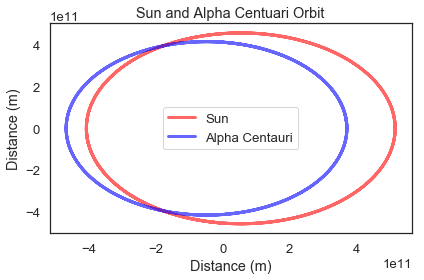

In [9]:
results,com_position,com_velocity=runSystem(1e9 *s, 7.785e11,1e6)
plot(results.x1,results.y1,'red', label = 'Sun')
plot(results.x2,results.y2,'blue', label = 'Alpha Centauri')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit',
             xlabel='Distance (m)', 
             ylabel='Distance (m)')
decorate_orbit()

This graph shows the orbital path of the Sun and Alpha Centuari when they begin at a distance of 778,500,000,000 meters, the distance between Jupiter and the Sun.

In [10]:
def addCOM(results,com_position,com_velocity):
    number=results.shape[0]
    x1= [0]*number
    x2=[0]*number
    y1= [0]*number
    y2=[0]*number
    for i in linrange(0,number):
        time=results.index[i]
        x1[i]=results.x1[time]+com_velocity.x*time
        x2[i]=results.x2[time]+com_velocity.x*time
        y1[i]=results.y1[time]+com_velocity.y*time
        y2[i]=results.y2[time]+com_velocity.y*time
    return x1,x2,y1,y2;

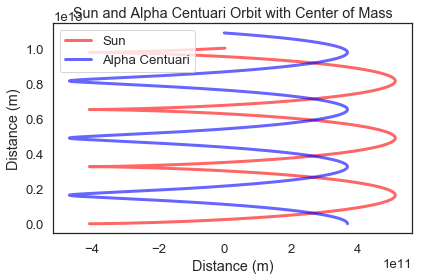

In [11]:
x1,x2,y1,y2=addCOM(results,com_position,com_velocity)
plot(x1,y1,'red', label='Sun')
plot(x2,y2,'blue', label='Alpha Centuari')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit with Center of Mass',
             xlabel='Distance (m)', 
             ylabel='Distance (m)')
decorate_orbit()

The graph above accounts for the movement of the center of mass between the two celstial bodies in space. From this graph we can tell that the bodies have revolved about three times, and moved about 1e13 meters from their starting point. 

To better understand the movement of the stars, in reference to each other, we decided to make a 3-D model of the system.

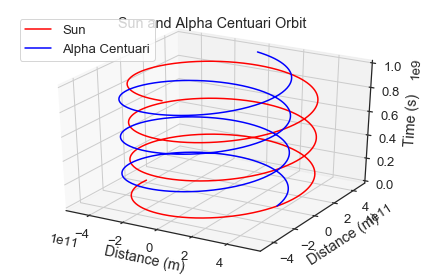

In [12]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y, Z = axes3d.get_test_data(0.05)

ax.plot(results.x1, results.y1, results.index, 'red', label='Sun')
ax.plot(results.x2, results.y2, results.index, 'blue', label='Alpha Centuari')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit',
             xlabel='Distance (m)', 
             ylabel='Distance (m)', zlabel='Time (s)')
decorate_orbit()
plt.show()

# Barely Stable Orbit

The three graphs below show the orbital path of the Sun and Alpha Centuari when they begin at a distance of 1,392,500,000,000 meters, almost the distance between Saturn and the Sun.

In [13]:
def runSystem(t_end,x2,max_step):

    t_end=t_end

    x1=0
    y1=0
    vx1=0
    vy1=0

    x2=x2
    y2=0
    vx2=0
    vy2=19986
    m1=1.989e30
    m2=1.989e30*1.1

    velocity1=Vector(vx1,vy1)
    velocity2=Vector(vx2,vy2)
    position1=Vector(x1,y1)
    position2=Vector(x2,y2)
    com_position=(position1*m1+position2*m2)/(m1+m2)
    com_velocity=(velocity1*m1+velocity2*m2)/(m1+m2)

    init=State(x1=x1-com_position.x,
           y1=y1-com_position.y,
           vx1=vx1-com_velocity.x,
           vy1=vy1-com_velocity.y,
           x2=x2-com_position.x,
           y2=y2-com_position.y,
           vx2=vx2-com_velocity.x,
           vy2=vy2-com_velocity.y)

    system = System(init=init, 
                    m1=m1, 
                    m2=m2, 
                    G=6.67e-11, 
                    t_end=t_end)
    results, details = run_ode_solver(system, slope_func,max_step=max_step)
    
    return results, com_position, com_velocity;


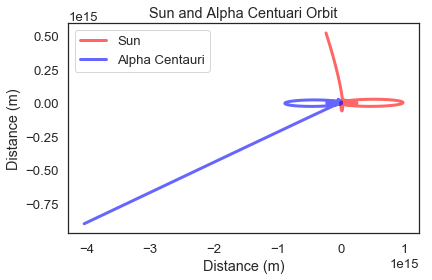

In [14]:
results,com_position,com_velocity=runSystem(2e13 *s, 1.3935*1000000000000,1e9);
plot(results.x1,results.y1,'red', label = 'Sun')
plot(results.x2,results.y2,'blue', label = 'Alpha Centauri')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit',
             xlabel='Distance (m)', 
             ylabel='Distance (m)')
decorate_orbit()


In [15]:
def addCOM(results,com_position,com_velocity):
    number=results.shape[0]
    x1= [0]*number
    x2=[0]*number
    y1= [0]*number
    y2=[0]*number
    for i in linrange(0,number):
        time=results.index[i]
        x1[i]=results.x1[time]+com_velocity.x*time
        x2[i]=results.x2[time]+com_velocity.x*time
        y1[i]=results.y1[time]+com_velocity.y*time
        y2[i]=results.y2[time]+com_velocity.y*time
    return x1,x2,y1,y2;

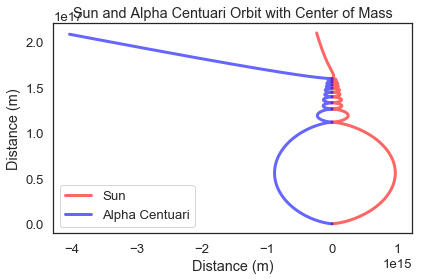

In [16]:
x1,x2,y1,y2=addCOM(results,com_position,com_velocity)
plot(x1,y1,'red', label='Sun')
plot(x2,y2,'blue', label='Alpha Centuari')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit with Center of Mass',
             xlabel='Distance (m)', 
             ylabel='Distance (m)')
decorate_orbit()

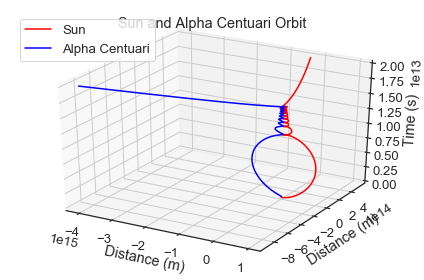

In [17]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot(results.x1, results.y1, results.index, 'red', label='Sun')
ax.plot(results.x2, results.y2, results.index, 'blue', label='Alpha Centuari')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit',
             xlabel='Distance (m)', 
             ylabel='Distance (m)', zlabel='Time (s)')
decorate_orbit()
plt.show()

# No Orbit

The three graphs below showthe orbital path of the Sun and Alpha Centuari when they begin at a distance of 5,906,380,000,000 meters, the distance between Pluto and the Sun.

In [18]:
def runSystem(t_end,x2,max_step):

    t_end=t_end

    x1=0
    y1=0
    vx1=0
    vy1=0

    x2=x2
    y2=0
    vx2=0
    vy2=19986
    m1=1.989e30
    m2=1.989e30*1.1

    velocity1=Vector(vx1,vy1)
    velocity2=Vector(vx2,vy2)
    position1=Vector(x1,y1)
    position2=Vector(x2,y2)
    com_position=(position1*m1+position2*m2)/(m1+m2)
    com_velocity=(velocity1*m1+velocity2*m2)/(m1+m2)

    init=State(x1=x1-com_position.x,
           y1=y1-com_position.y,
           vx1=vx1-com_velocity.x,
           vy1=vy1-com_velocity.y,
           x2=x2-com_position.x,
           y2=y2-com_position.y,
           vx2=vx2-com_velocity.x,
           vy2=vy2-com_velocity.y)

    system = System(init=init, 
                    m1=m1, 
                    m2=m2, 
                    G=6.67e-11, 
                    t_end=t_end)
    results, details = run_ode_solver(system, slope_func,max_step=max_step)
    
    return results, com_position, com_velocity;

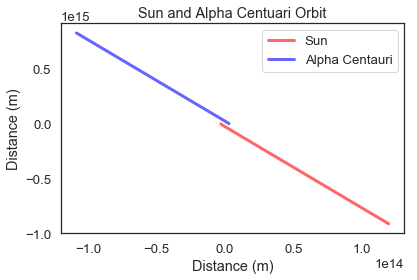

In [19]:
results,com_position,com_velocity=runSystem(1e11 *s, 5906380000000,1e12);
plot(results.x1,results.y1,'red', label = 'Sun')
plot(results.x2,results.y2,'blue', label = 'Alpha Centauri')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit',
             xlabel='Distance (m)', 
             ylabel='Distance (m)')
decorate_orbit()

In [20]:
def addCOM(results,com_position,com_velocity):
    number=results.shape[0]
    x1= [0]*number
    x2=[0]*number
    y1= [0]*number
    y2=[0]*number
    for i in linrange(0,number):
        time=results.index[i]
        x1[i]=results.x1[time]+com_velocity.x*time
        x2[i]=results.x2[time]+com_velocity.x*time
        y1[i]=results.y1[time]+com_velocity.y*time
        y2[i]=results.y2[time]+com_velocity.y*time
    return x1,x2,y1,y2;

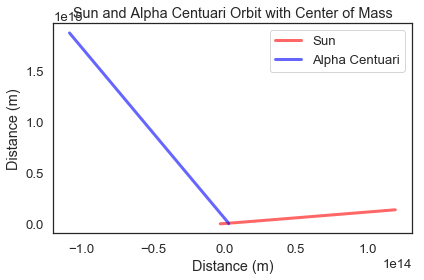

In [21]:
x1,x2,y1,y2=addCOM(results,com_position,com_velocity)
plot(x1,y1,'red', label='Sun')
plot(x2,y2,'blue', label='Alpha Centuari')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit with Center of Mass',
             xlabel='Distance (m)', 
             ylabel='Distance (m)')
decorate_orbit()

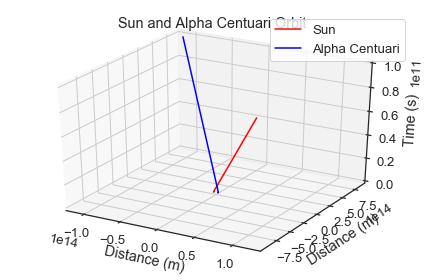

In [22]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot(results.x1, results.y1, results.index, 'red', label='Sun')
ax.plot(results.x2, results.y2, results.index, 'blue', label='Alpha Centuari')
def decorate_orbit():
    """Add a title and label the axes."""
    decorate(title='Sun and Alpha Centuari Orbit',
             xlabel='Distance (m)', 
             ylabel='Distance (m)', zlabel='Time (s)')
decorate_orbit()
plt.show()

# Results and Interpretation

If Alpha Centuari comes as close to the Sun as Saturn or further away, it will escape the Sun's gravity and shoot off into space with a slight deflection. On the other hand, Alpha Centuari will enter a binary star system with the Sun if it is 1,392,500,000,000 meters or closer. This model has the potential to helps us understand how binary star systems form as it is difficult to observe these types of these events because they are extremely infrequent. However, this model is limited in many important respects, primarily because it does not take into acoount other bodies and includes minute calculation errors that cause bodies to drift towards each other over time. If we were able to simulate the system without error, we could begin to understand how orbits shift over time. However, the ODE solver limits this type of analysis when the time period gets very large.

# Appendix


In order to create these models, we referenced several academic papers that provided more realistic context to our model and help justify our assumptions. We tried in all cases to use real values for all variables.

Sources:
    http://joss.tcnj.edu/wp-content/uploads/sites/176//2012/04/2012-Silano-Revised.pdf
    https://www.space.com/22509-binary-stars.html
    https://i.stack.imgur.com/3Bqxg.png
    https://en.wikipedia.org/wiki/Alpha_Centauri

Because of the length of code to run our model, we decided to hide repetivite code and code not essential to the generation of our data. Hiding the code allows for a smoother read of our model.